In [48]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [36]:
#The dataset contains no header for columns, hence the header parameter
abnormal=pd.read_csv('./ptbdb_abnormal.csv',header=None)
normal=pd.read_csv('./ptbdb_normal.csv',header=None)

In [45]:
data = pd.concat([abnormal, normal]).sample(frac=1).reset_index(drop=True)

In [53]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-2]]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.25,random_state=42)
print(x_train.shape)

(3638, 186)


In [56]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,186,1])

In [57]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,186,1])

In [65]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(186,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5,activation='softmax') #softmax cuz categories
])

In [66]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=128,epochs=200,verbose=True,validation_split=0.2)

Epoch 1/200
23/23 [==============================] - 2s 25ms/step - loss: 1.3391 - accuracy: 0.4701 - val_loss: 1.4191 - val_accuracy: 0.7555
Epoch 2/200
23/23 [==============================] - 0s 16ms/step - loss: 0.6482 - accuracy: 0.7378 - val_loss: 1.2566 - val_accuracy: 0.7335
Epoch 3/200
23/23 [==============================] - 0s 15ms/step - loss: 0.4828 - accuracy: 0.7808 - val_loss: 1.0600 - val_accuracy: 0.7294
Epoch 4/200
23/23 [==============================] - 0s 17ms/step - loss: 0.3862 - accuracy: 0.8344 - val_loss: 0.9819 - val_accuracy: 0.7335
Epoch 5/200
23/23 [==============================] - 0s 19ms/step - loss: 0.3060 - accuracy: 0.8749 - val_loss: 0.9229 - val_accuracy: 0.7445
Epoch 6/200
23/23 [==============================] - 0s 16ms/step - loss: 0.2585 - accuracy: 0.8979 - val_loss: 0.8636 - val_accuracy: 0.7541
Epoch 7/200
23/23 [==============================] - 0s 20ms/step - loss: 0.2369 - accuracy: 0.9072 - val_loss: 0.7794 - val_accuracy: 0.7541
Epoch 

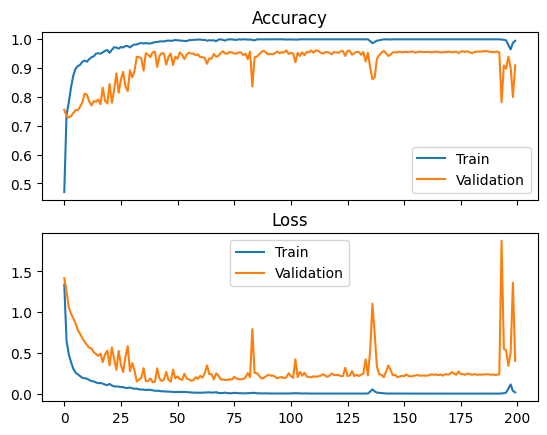

In [68]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [69]:
model.evaluate(x_test, y_test, verbose=True)

342/342 [==============================] - 1s 3ms/step - loss: 0.4733 - accuracy: 0.9067


[0.4732553958892822, 0.906725287437439]